In [5]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [6]:
x_mu=550
x_sigma=35

In [7]:
X = np.random.normal(x_mu,x_sigma,1000)

In [8]:
y_mu=350
y_sigma=65


In [9]:
Y = np.random.normal(y_mu,y_sigma,1000)



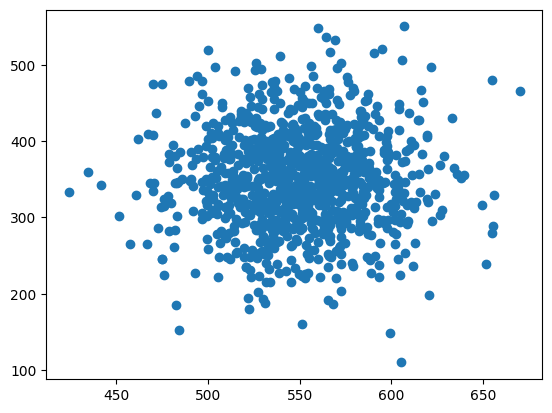

In [10]:
plt.scatter(X,Y)

In [11]:
df = pd.DataFrame(data=X)

In [12]:
df['Y']=Y

In [13]:
df['X']=df[0]
df=df.drop(0,axis=1)

In [14]:
df.head()

,Y,X
0,350.031555,567.535602
1,419.992047,587.048212
2,376.953536,524.444540
3,425.277060,519.881507
4,282.815649,479.011164


In [15]:
df= df.sample(frac=1)
ratio = 0.70
tot_rows = df.shape[0]
train_size = int(tot_rows*ratio)
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1:].values
X_train = X[0:train_size]
X_test = X[train_size:]
Y_train = Y[0:train_size]
Y_test = Y[train_size:]

In [16]:
pred_Y=0

In [17]:
def Gdt_Dsd(Learning_Rate,Itr):
    global pred_Y
    slope=0
    coef=0
    n = len(X_train)
    for i in range(Itr): 
        pred_Y = slope*X_train + coef 
        D_m = (-2/n) * np.sum((X_train * (Y_train - pred_Y ))) 
        D_c = (-2/n) * np.sum((Y_train - pred_Y) )
        slope = slope - (Learning_Rate * D_m)
       
        coef = coef - (Learning_Rate * D_c) 
    return slope,coef

In [18]:
slope,coef=Gdt_Dsd(0.00001,1000)

In [19]:
slope,coef

(-7.119820257576897e+191, -1.9602158739866307e+189)

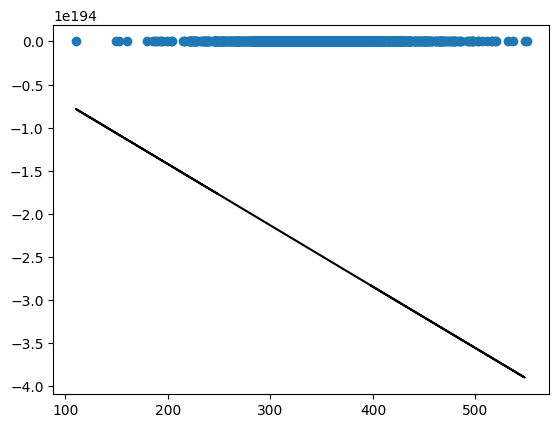

In [20]:
plt.plot(X_train,X_train*slope+coef,color = "black")
plt.scatter(X,Y)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
reg=LinearRegression()
reg.fit(X_train,Y_train)
Y_pred=reg.predict(X_test)

In [23]:
print(reg.intercept_)
print(reg.coef_)

[543.6723]
[[0.01712646]]


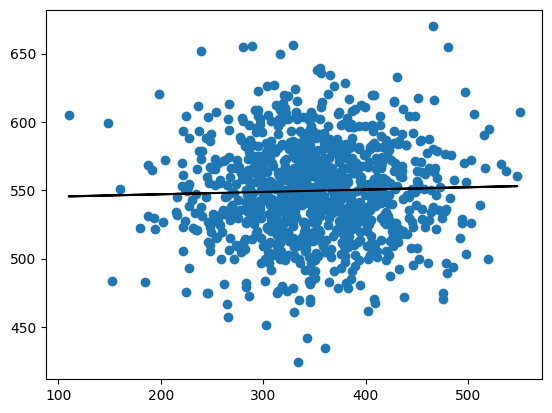

In [24]:
plt.plot(X_train,X_train*reg.coef_+reg.intercept_,color = "black")
plt.scatter(X,Y)

Conclusion:- The Gradient Descent gives the best fit line better using the SKLEARN library.